In [7]:
import random
import array
import cv2
import math
from timeit import timeit
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (30, 10)
default_figsize = (20, 10)

In [2]:
def timefunc(loops, func, *args, **kwargs):
    def wrapper(func, *args, **kwargs):
        def wrapped():
            return func(*args, **kwargs)
        return wrapped
    wrapped = wrapper(func, *args, **kwargs)
    return timeit(wrapped, number=loops)/loops*1000

In [ ]:
def myplot(title, x, sets):
    fig, ax = plt.subplots(figsize = default_figsize)
    ax.set_xlabel('Number of Elements')
    ax.set_ylabel('Duration (ms)')
    for set_name, y in sets.items():
        ax.plot(x, y, label=set_name)
    ax.legend()  
    return fig, ax

In [ ]:
x = [2**i for i in range(1,21)]
y_sets = {}

In [ ]:
def mult_loop(data, multiplicant):
    assert isinstance(data, list)
    newlist = []
    for element in data:
        newlist.append(element * multiplicant)
    return newlist

y_sets['Loop'] = [timefunc(100, mult_loop, [random.random() for j in range(i)], random.random()) for i in x]

myplot('Multiplication', x, y_sets)

In [ ]:
def mult_loop_inplace(data, multiplicant):
    assert isinstance(data, list)
    for i in range(len(data)):
        data[i] *= multiplicant
    return data

y_sets['Loop - In-Place'] = [timefunc(100, mult_loop_inplace, [random.random() for j in range(i)], random.random()) for i in x]

myplot('Multiplication', x, y_sets)

In [ ]:
def mult_comp(data, multiplicant):
    assert isinstance(data, list)
    return [i * multiplicant for i in data]

y_sets['Comprehension'] = [timefunc(100, mult_comp, [random.random() for j in range(i)], random.random()) for i in x]

myplot('Multiplication', x, y_sets)

In [ ]:
def mult_map(data, multiplicant):
    assert isinstance(data, list)
    def mapfunc(n):
        return n*multiplicant
    return list(map(mapfunc, data))

y_sets['Map'] = [timefunc(100, mult_comp, [random.random() for j in range(i)], random.random()) for i in x]

myplot('Multiplication', x, y_sets)

In [ ]:
def mult_array(data, multiplicant):
    assert isinstance(data, array.array)
    for i in range(len(data)):
        data[i] *= multiplicant
    return data

y_sets['Array - In-Place'] = [timefunc(100, mult_array, array.array('f', [random.random() for j in range(i)]), random.random()) for i in x]

myplot('Multiplication', x, y_sets)

In [48]:
import numpy as np

In [ ]:
data_list = [i for i in range(20)]

In [ ]:
data_np = np.array(data_list)
data_np

In [ ]:
data_np*1.9

In [ ]:
def mult_np_convert(data, multiplicant):
    assert isinstance(data, list)
    data_np = np.array(data)
    return data_np*multiplicant

y_sets['NumPy - Conversion'] = [timefunc(100, mult_np_convert, [random.random() for j in range(i)], random.random()) for i in x]

myplot('Multiplication', x, y_sets)

In [ ]:
def mult_np_direct(data, multiplicant):
    assert isinstance(data, np.ndarray)
    return data*multiplicant

y_sets['NumPy - Direct'] = [timefunc(100, mult_np_direct, np.random.rand(i), random.random()) for i in x]

myplot('Multiplication', x, y_sets)

In [ ]:
data = np.random.rand(100)
np.sin(data)

In [ ]:
def ewvm_loop(v1, v2):
    assert isinstance(v1, list)
    assert isinstance(v2, list)
    assert len(v1) == len(v2)
    v3 = []
    for i in range(len(v1)):
        v3.append(v1[i] * v2[i])
    return v3

def ewvm_loop_inplace(v1, v2):
    assert isinstance(v1, list)
    assert isinstance(v2, list)
    assert len(v1) == len(v2)
    for i in range(len(v1)):
        v1[i] *= v2[i]
    return v1

def ewvm_comp(v1, v2):
    assert isinstance(v1, list)
    assert isinstance(v2, list)
    assert len(v1) == len(v2)
    return [v1[i] * v2[i] for i in range(len(v1))]

def ewvm_map(v1, v2):
    assert isinstance(v1, list)
    assert isinstance(v2, list)
    assert len(v1) == len(v2)
    return list(map(lambda el: el[1]*v2[el[0]], enumerate(v1)))

def ewvm_np_convert(v1, v2):
    assert isinstance(v1, list)
    assert isinstance(v2, list)
    assert len(v1) == len(v2)
    v1_np = np.array(v1)
    v2_np = np.array(v2)
    return np.multiply(v1_np, v2_np)

def ewvm_np_direct(v1, v2):
    assert isinstance(v1, np.ndarray)
    assert isinstance(v2, np.ndarray)
    assert len(v1) == len(v2)
    return np.multiply(v1, v2)

In [ ]:
# Prove that the various methods have the same result
d1 = [random.random() for j in range(100)]
d2 = [random.random() for j in range(100)]

baseline = ewvm_loop(d1, d2)
assert ewvm_comp(d1, d2) == baseline
assert ewvm_map(d1, d2) == baseline
assert ewvm_np_convert(d1, d2).tolist() == baseline
assert ewvm_np_direct(np.array(d1), np.array(d2)).tolist() == baseline
assert ewvm_loop_inplace(d1,d2) == baseline

In [ ]:
x = [2**i for i in range(1,19)]
y_sets = {}

loops = 100
y_sets['Loop'] = [timefunc(loops, ewvm_loop, [random.random() for j in range(i)],  [random.random() for j in range(i)]) for i in x]
y_sets['Loop - In-Place'] = [timefunc(loops, ewvm_loop_inplace, [random.random() for j in range(i)], [random.random() for j in range(i)]) for i in x]
y_sets['Comprehension'] = [timefunc(loops, ewvm_comp, [random.random() for j in range(i)], [random.random() for j in range(i)]) for i in x]
y_sets['Map'] = [timefunc(loops, ewvm_map, [random.random() for j in range(i)], [random.random() for j in range(i)]) for i in x]
y_sets['NumPy - Conversion'] = [timefunc(loops, ewvm_np_convert, [random.random() for j in range(i)], [random.random() for j in range(i)]) for i in x]
y_sets['NumPy - Direct'] = [timefunc(loops, ewvm_np_direct, np.random.rand(i), np.random.rand(i)) for i in x]

myplot('Multiplication', x, y_sets)

In [ ]:
y_sets['Comprehension'][-1] / y_sets['NumPy - Direct'][-1]

In [ ]:
def op_comp(v1, v2):
    assert isinstance(v1, list)
    assert isinstance(v2, list)
    return [[v1[i]*v2[j] for j in range(len(v2))] for i in range(len(v1))]

def op_np(v1, v2):
    assert isinstance(v1, np.ndarray)
    assert isinstance(v2, np.ndarray)
    return np.outer(v1, v2)

In [ ]:
v1 = [random.random() for j in range(10)]
v2 = [random.random() for j in range(10)]

a = op_comp(v1, v2)
b = op_np(np.array(v1), np.array(v2))
assert a == b.tolist()

In [ ]:
b.shape

In [ ]:
b

In [ ]:
x = [2**i for i in range(1,13)]
y_sets = {}

loops = 10
y_sets['Comprehension'] = [timefunc(loops, op_comp, [random.random() for j in range(i)],  [random.random() for j in range(i)]) for i in x]
y_sets['NumPy'] = [timefunc(loops, op_np, np.array([random.random() for j in range(i)]), np.array([random.random() for j in range(i)])) for i in x]

myplot('Outer Product', x, y_sets)

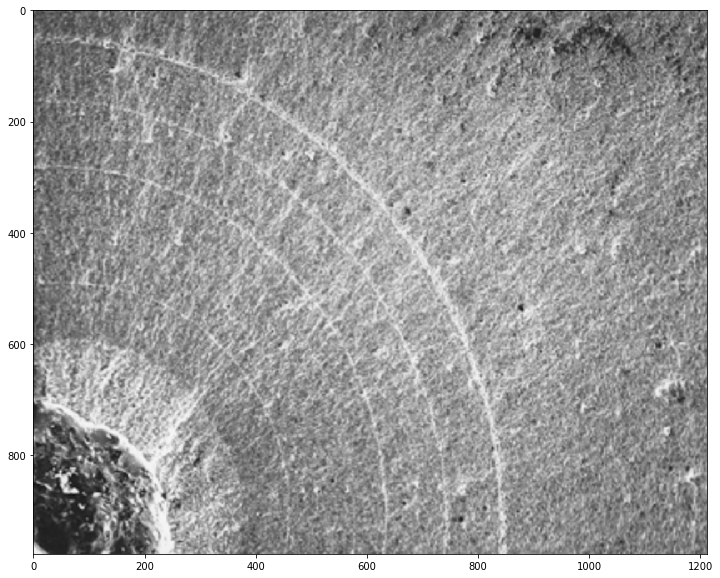

In [36]:
metal = cv2.imread('metal.png')
plt.imshow(metal, cmap='gray',interpolation='nearest')

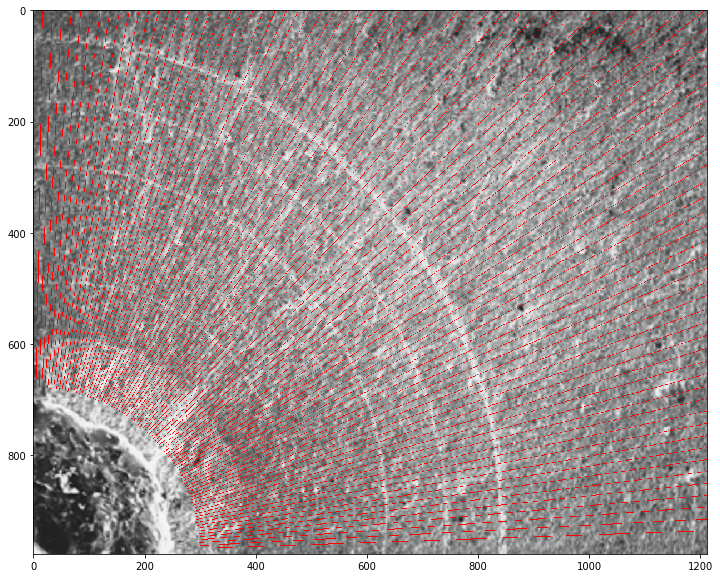

In [56]:
start_coords = [300, 50]
min_radius = 300
# Theoretical maximum radius is corner-to-corner, or sqrt(h^2 + w^2)
max_radius = math.ceil(math.sqrt(metal.shape[0]**2 + metal.shape[1]**2))
radii = [i for i in range(min_radius, max_radius)]

metal_searchlines = metal.copy()
metal = cv2.cvtColor(metal, cv2.COLOR_BGR2GRAY)

angles = [i for i in range(1, 90)]
all_line_coords = []
for a in range(len(angles)):
    line_coords = []
    for r in radii:
        y = int(round(metal.shape[0] - r * math.cos(a * math.pi / 180)))
        x = int(round(r * math.sin(a * math.pi / 180)))
        if y > 0 and x < metal.shape[1]:
            metal_searchlines[y, x] = [255, 0, 0]
            line_coords.append([y, x])
    all_line_coords.append(line_coords)
    
plt.imshow(metal_searchlines, interpolation='nearest')

In [57]:
all_line_vals = []
for line_coords in all_line_coords:
    line_vals = []
    for coord in line_coords:
        line_vals.append(metal[coord[0], coord[1]])
    all_line_vals.append(line_vals)

In [61]:
all_line_change_points = []
for line_vals in all_line_vals:
    line_change_points = []
    last_val = line_vals[0]
    for i in range(1, len(line_vals)):        
        #if abs(line_vals[i] - last_val) > 20:
        #    line_change_points.append(i)
        last_val = line_vals[i]
    all_line_change_points.append(line_change_points)

In [ ]:

angles = np.arange(start=min_angle, stop=max_angle, step=angle_step, dtype=np.float32)